## Missing Numerical Data 

# Two ways ---> 1) Univariate Imputation 2)Multivariate imputation

# Unvariate Imputation : 

Filling the missing spaces with the help of that column itselt i.e (its mean, median, etc) without taking help of other columns

Four ways in it :

        1) Mean/Median , etc

        2) Aribitary

        3) End of Atribute

        4) Random

## A) Mean/Median imputation

When to use mean, median, mode

- MCAR : Data is missing completely at random

- If missing data is less than 5%

- If data is normal.., use mean.   If data is slightly/ more skew use median

#Advantages

- Simple and easy to implement

#Disadvantages

- Changes the shape of the distribution

- Outliers : May introuduce additional outliers

- Covariance/ correlation changes : Relationship of feature may change with other features

#Coding Part -> 1) using pandas 2) Using Sklearn

# Using Pandas

In [26]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Datasets\titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
x_train,x_test,  y_train , y_test =  train_test_split(x , y, test_size = 0.2, random_state = 42)

In [14]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [15]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [18]:
age_mean = x_train['Age'].mean()
age_median = x_train['Age'].median()

fare_mean = x_train['Fare'].mean()
fare_median = x_train['Fare'].median()

In [20]:
x_train['mean_age'] = x_train['Age'].fillna(age_mean)
x_train['median_age'] = x_train['Age'].fillna(age_median)

x_train['mean_fare'] = x_train['Fare'].fillna(fare_mean)
x_train['median_fare'] = x_train['Fare'].fillna(fare_median)

In [21]:
x_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
453,49.0,89.1042,1,49.000000,49.0,89.1042,89.1042
723,50.0,13.0000,0,50.000000,50.0,13.0000,13.0000
692,NaN,56.4958,0,29.498846,28.0,56.4958,56.4958
704,26.0,7.8542,1,26.000000,26.0,7.8542,7.8542
630,80.0,30.0000,0,80.000000,80.0,30.0000,30.0000


In [23]:
print("Age")
print(f"Orignal_variance : {x_train['Age'].var()}, orignal_mean : {x_train['Age'].mean()}, orignal_medain: {x_train['Age'].median()}")
print(f"mean_variance : {x_train['mean_age'].var()}, mean_mean : {x_train['mean_age'].mean()}, mean_medain: {x_train['mean_age'].median()}")
print(f"median_variance : {x_train['median_age'].var()}, orignal_mean : {x_train['median_age'].mean()}, orignal_medain: {x_train['median_age'].median()}")
print("")
print("Fare")
print(f"Orignal_variance : {x_train['Fare'].var()}, orignal_mean : {x_train['Fare'].mean()}, orignal_medain: {x_train['Fare'].median()}")
print(f"mean_variance : {x_train['mean_fare'].var()}, mean_mean : {x_train['mean_fare'].mean()}, mean_medain: {x_train['mean_fare'].median()}")
print(f"median_variance : {x_train['median_fare'].var()}, orignal_mean : {x_train['median_fare'].mean()}, orignal_medain: {x_train['median_fare'].median()}")


Age
Orignal_variance : 210.2517072477435, orignal_mean : 29.498846153846156, orignal_medain: 28.0
mean_variance : 168.85193366872227, mean_mean : 29.498846153846152, mean_medain: 29.498846153846156
median_variance : 169.20731007048155, orignal_mean : 29.204129213483146, orignal_medain: 28.0

Fare
Orignal_variance : 2761.0314349486343, orignal_mean : 32.51778772189349, orignal_medain: 14.4
mean_variance : 2621.232374951235, mean_mean : 32.51778772189349, mean_medain: 15.3729
median_variance : 2637.012481677765, orignal_mean : 31.601719803370788, orignal_medain: 14.4


<Axes: ylabel='Density'>

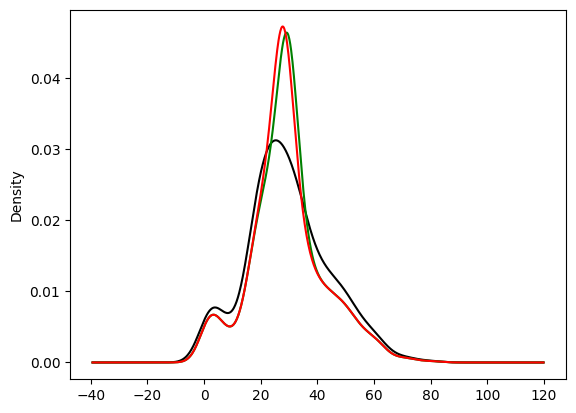

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
x_train['Age'].plot(kind = 'kde', ax=ax , color= 'black')

#variable imputed with median
x_train['mean_age'].plot(kind = 'kde', ax = ax, color = 'green')

#variable imputed with mean
x_train['median_age'].plot(kind = 'kde', ax = ax , color = 'red')

<Axes: ylabel='Density'>

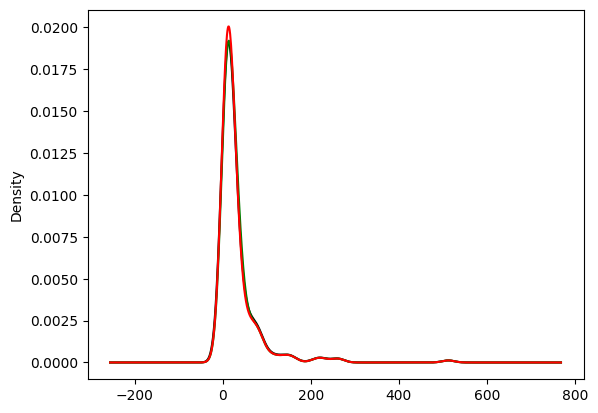

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
x_train['Fare'].plot(kind = 'kde', ax=ax , color= 'black')

#variable imputed with median
x_train['mean_fare'].plot(kind = 'kde', ax = ax, color = 'green')

#variable imputed with mean
x_train['median_fare'].plot(kind = 'kde', ax = ax , color = 'red')

In [34]:
#Checking covariance
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
mean_age,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
median_age,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
mean_fare,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
median_fare,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [35]:
#Checking correlation
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
mean_age,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
median_age,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
mean_fare,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
median_fare,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

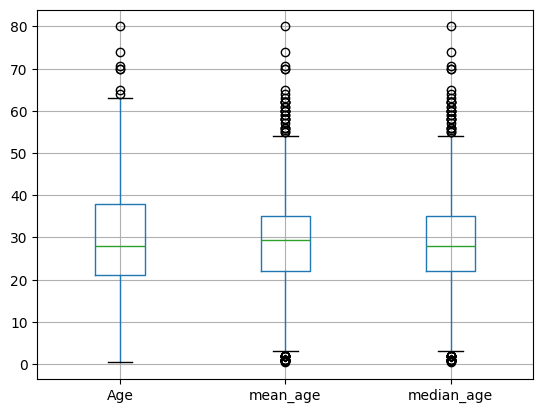

In [37]:
x_train[['Age', 'mean_age', 'median_age']].boxplot()

<Axes: >

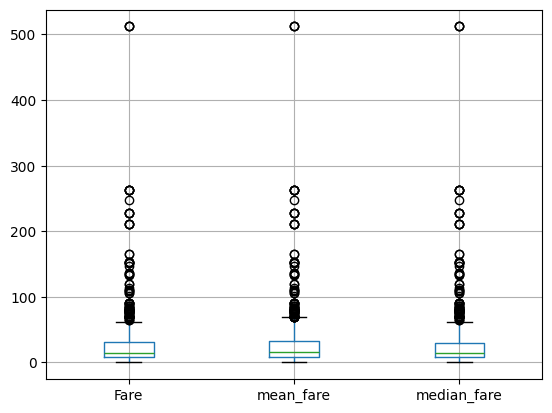

In [38]:
x_train[['Fare', 'mean_fare', 'median_fare']].boxplot()

# Using Sk-learn

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [44]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy='median')

In [45]:
trf = ColumnTransformer([
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [46]:
trf.fit(x_train)

C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [47]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [48]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [49]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [50]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])